<a href="https://colab.research.google.com/github/trinhvanypro1/-DataAnalystDeepLearning/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learn**

Mean - Mode - Median

Mode: là giá trị xuất hiện nhiều nhất trong tập dữ liệu

In [103]:
from scipy import stats
speed=[99,86,87,88,111,86,103,87,94,78,77,85,86]
mode=stats.mode(speed)
mode

ModeResult(mode=array([86]), count=array([3]))

Median là giá trị nằm giữa, sau khi được sắp xếp các giá trị

In [104]:
import numpy as np
speed=[99,86,87,88,111,86,103,87,94,78,77,85,86]
np.median(speed)

87.0

Mean là giá trị trung  bình

In [105]:
speed=[99,86,87,88,111,86,103,87,94,78,77,85,86]
np.mean(speed)

89.76923076923077

Dùng đồ thị Histogram, đồ thị boxplot và các độ đo thống kê để khảo sát hình dạng phân phối

In [106]:
import pandas as np
dt_xettuyen=pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/dulieuxettuyendaihoc.csv")


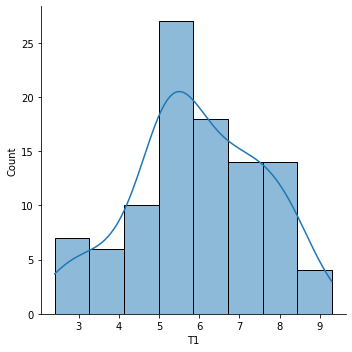

In [107]:
import seaborn as sns
sns.displot(dt_xettuyen,x='T1',kde=True)

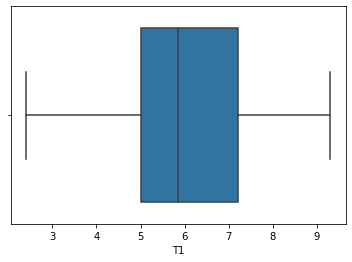

In [108]:
sns.boxplot(x='T1',data=dt_xettuyen)

Dựa vào histogram ta có thể thấy hình dạng phân phối của T1 có dạng xấp xỉ đối xứng, nhưng đồ thị boxplot ta lại thấy phân phối của T1 hơi lệch trái. Ta dùng thêm các đặc trưng số của T1 để có thêm thông tin

In [109]:
mean=dt_xettuyen['T1'].mean()
median=dt_xettuyen['T1'].median()
mode=dt_xettuyen['T1'].mode()

In [110]:
print('Mean = ',mean)
print('Median= ',median)
print('Mode = ')
print(mode)

Mean =  5.946000000000001
Median=  5.85
Mode = 
0    5.2
1    5.3
2    7.3
dtype: float64


Kết luận: Ta thấy **Mean > Median** nên hình dáng phân phối của T1 lệch phải.

***Skewness và Kurtosis***

In [111]:
#tinh skewness:
from scipy.stats import skew
skew(dt_xettuyen['T1'], bias=False)

-0.17824317486762223

In [112]:
#Tinh kurtosis:
from scipy.stats import kurtosis
kurtosis(dt_xettuyen['T1'],bias=False)

-0.48010360836580546

Phân tích các dữ liệu quan sát được để trả lời câu hỏi: Việc bà mẹ hút thuốc
khi mang thai có ảnh hưởng đến cân nặng của trẻ sơ sinh hay không?

Thêm dữ liệu:

In [113]:
import pandas as pd
import numpy as np
babies=pd.read_fwf('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/babies.txt')

In [114]:
babies.head(3)

,bwt,smoke
0,120.0,0.0
1,113.0,0.0
2,128.0,1.0


Gán giá trị để vui =)))):

In [116]:
nosmoke=babies[babies['smoke']==0]

In [117]:
unknown=babies[babies['smoke']==9]

Tạo hàm tính Q1,Q2,Q3:

In [118]:
def percentile(n):
  def percentile_(x):
    return np.percentile(x,n)
  percentile_.__name__= 'percentile_%s' %n
  return percentile_

Tạo hàm IQR

In [119]:
def IQR(x):
  return np.subtract(*np.percentile(x, [75, 25]))

Thống kê và trình bày dữ liệu:

- Tính các đại lượng thống kê cho 3 tập dữ liệu:

In [120]:
table_statistical=babies[babies.smoke.isin(['0','1','9'])].groupby(['smoke']).agg({'count','var','min','max','mean','std','median',percentile(0),percentile(25),percentile(50),percentile(75),IQR,'skew'}).rename(columns={'bwt':'Statistical'})

In [136]:
table_statistical=table_statistical.rename(columns={'median':'Median','var':'Var','mean':'Mean','std':'Std','max':'Max','min':'Min','skew':'Skewness','count':'Count','percentile_0':'Q0','percentile_25':'Q1','percentile_50':'Q2','percentile_75':'Q3'})
table_statistical

Statistical                             ...                           
              IQR Median      Q1         Var  ...   Min    Q0     Q2      Q3
smoke                                         ...                           
0.0          21.0  123.0  113.00  302.714371  ...  55.0  55.0  123.0  134.00
1.0          24.0  115.0  102.00  327.571835  ...  58.0  58.0  115.0  126.00
9.0          32.0  128.0  109.75  475.788889  ...  90.0  90.0  128.0  141.75

[3 rows x 13 columns]

In [139]:
from scipy.stats import kurtosis
kur_smoke=kurtosis(smoke, fisher=False)
kur_no_smoke=kurtosis(nosmoke, fisher=False)
kur_unknown=kurtosis(unknown, fisher=False)

In [138]:
kur_smoke

array([3.00040781, 0.        ])

In [125]:
kur_no_smoke

array([4.03706031, 0.        ])

In [134]:
kur_unknown

array([1.93273825, 0.        ])

In [147]:
smoke=babies.loc[babies['smoke']==1]

Nhận xét:

TH1: Đối với bà mẹ có hút thuốc:

-Vị trí tập trung của dữ liệu nằm ở giá trị: 115

-Tính biến động của dữ liệu:

  +Phương sai: Var=327.571835

  +Độ lệch chuẩn: Std=

  +Khoảng giá trị: (Min= ,Max= , -> range=)

  +Khoảng các giữa 2 phần tư vị: IQR=Q3-Q1=

Kết luận: Như vậy dữ liệu phân bố gần nhau

Hình dạng dữ



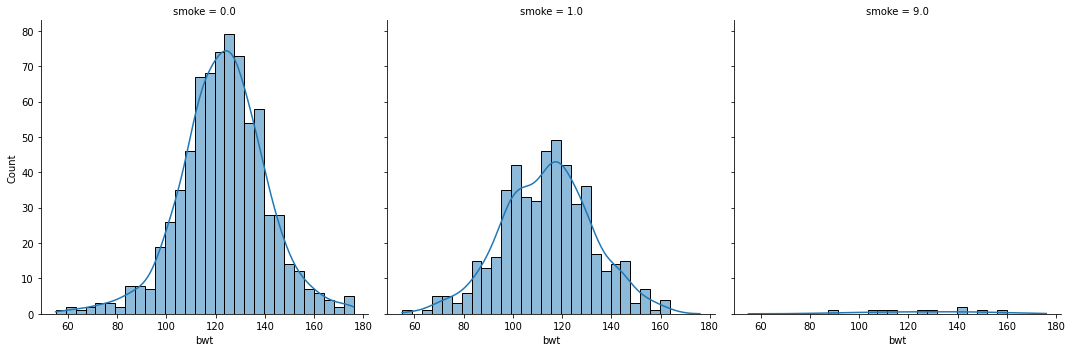

In [156]:
sns.displot(babies,x='bwt',col='smoke',kde=True)